In [1]:
# libs
import pandas as pd
import numpy as np
import geopandas as gpd
import requests

from PIL import Image
from io import BytesIO

In [2]:
# load data
df = gpd.read_file('../data/plot_data_train.gpkg')

In [4]:
#pixel length and width specs
sample_poly = df.iloc[0].iloc[3]
minx, miny, maxx, maxy = sample_poly.bounds
aspect_ratio = ((maxx-minx)/(maxy-miny))
x_pix_len = 284 #this is the maximum x pixels, it was determined through trial and error
y_pix_len = round(x_pix_len*aspect_ratio)

In [5]:
aspect_ratio

1.2999999999801048

In [6]:
df.sample()

,plot_id,zone_id,intersects_zones,geometry
124,X07-Y40,zone_D,True,"POLYGON ((-84.47819 42.7321, -84.47754 42.7321..."


In [17]:
def get_plot_images(gdf, limit=None):
    for i, row in gdf.iterrows():
        poly = row.iloc[3]
        plot_id = row.iloc[0]
        minx, miny, maxx, maxy = poly.bounds
        esri_url = f"https://services.arcgisonline.com/arcgis/rest/services/World_Imagery/MapServer/export?bbox={minx},{miny},{maxx},{maxy}&bboxSR=4326&imageSR=4326&size={x_pix_len},{y_pix_len}&f=image"
        response = requests.get(esri_url)  #written by gpt 4o
        filename = '../Plot_Images/train/' + plot_id + 'test' + '.png'
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            img.save(filename)
        else:
            print("Failed to retrieve plot image " + plot_id + ".")
        if i == limit:
            break
    return(img)

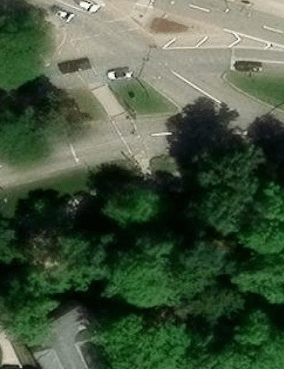

In [19]:
get_plot_images(df, limit=1)

